In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
env_name = 'CustomPendulum-v0'
env_str="pendulum"
figfilenamehead = "fig_policy_evaluation_pendulum_"

bif_c = 0.1
num_iter_max=10000
vae_lr=5e-4

seed = 0


In [2]:
env = gym.make(env_name)


env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = 1
print(s_dim, a_dim, z_dim)

# print(np.random.randn())
# print(torch.randn(1))

c = 0.21455680991172585
2 1 1


/home/thishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/thishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/thishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/thishinuma/anaconda3/envs/iwvi/lib/python3.8/site

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)
# print(np.random.randn())
# print(torch.randn(1))

Loading models from checkpoints/sac_checkpoint_custom_pendulum_mdp_


In [4]:
# # # # データ生成
# from get_offline_data import getOfflineData
# getOfflineData(env_name=env_name, episode_num=100)

In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

(100, 2)


In [6]:
# import importlib
# importlib.reload(vi_base)
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":agent.policy.my_np_select_action,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env
    }

vi = vi_base.baseVI(args_init_dict)
# print(np.random.randn())
# print(torch.randn(1))

In [7]:
vi.get_real_rollout_mdppolicy_data()

/home/thishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/thishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/thishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/thishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f

0  c = 0.16346495489906906
1  c = 0.175923049855898
2  c = 0.213101048692264
3  c = 0.14501806056071762
4  c = 0.004052611988015664
5  c = 0.120134560420777
6  c = 0.25697024030079035
7  c = 0.09642657758269942
8  c = 0.05526129195564814
9  c = 0.11417486037608537
10  c = 0.25864988011260814
11  c = 0.020876132555705383
12  c = 0.2613891486606151
13  c = 0.10624180953664825
14  c = 0.03203027777652895
15  c = 0.1622476552961531
16  c = 0.1618277342655034
17  c = 0.055320312028603325
18  c = 0.09391364165595244
19  c = 0.11885913261799258
20  c = 0.11403897859981632
21  c = 0.09912067121474619
22  c = 0.06488189030041151
23  c = 0.03506631058301788
24  c = 0.19965083813641546
25  c = 0.08571604451747712
26  c = 0.1514796791677473
27  c = 0.04546713757372708
28  c = 0.13733918450179566
29  c = 0.1522597624567635
30  c = 0.02389789952996266
31  c = 0.0638122346167221
32  c = 0.28146488121321594
33  c = 0.2259386184773079
34  c = 0.28977259206899
35  c = 0.15402135084365112
36  c = 0.14479

tensor(2.8330)tensor(6.4749)tensor(5.2778)tensor(4.9017)tensor(2.9698)tensor(9.6140)tensor(3.4960)tensor(4.4339)tensor(3.6634)tensor(4.1051)tensor(3.8289)tensor(7.3527)tensor(4.2839)tensor(7.1324)tensor(8.5549)tensor(9.5053)tensor(5.1862)tensor(6.2448)tensor(3.2380)tensor(4.6179)tensor(6.9106)tensor(6.1630)tensor(4.6974)tensor(3.1409)tensor(6.1055)tensor(6.9212)tensor(3.6279)tensor(5.0028)tensor(4.4461)tensor(3.4110)tensor(5.4212)tensor(3.0558)tensor(6.9153)tensor(5.9164)tensor(5.6316)tensor(10.)tensor(5.3057)tensor(4.1543)tensor(4.9349)tensor(6.5062)tensor(5.7659)tensor(3.6379)tensor(7.7655)tensor(4.1452)tensor(4.3297)tensor(6.4458)tensor(4.1032)tensor(3.5447)tensor(5.9673)tensor(4.6048)tensor(2.7983)tensor(3.4896)tensor(6.6367)tensor(3.5696)tensor(7.7458)tensor(3.1576)tensor(3.3562)tensor(5.6942)tensor(3.5629)tensor(5.5337)tensor(6.5587)tensor(2.4693)tensor(3.3149)tensor(3.4391)tensor(4.6163)tensor(5.3689)tensor(6.5360)tensor(2.7579)tensor(3.3110)tensor(5.8046)tensor(3.2051)tensor(5.

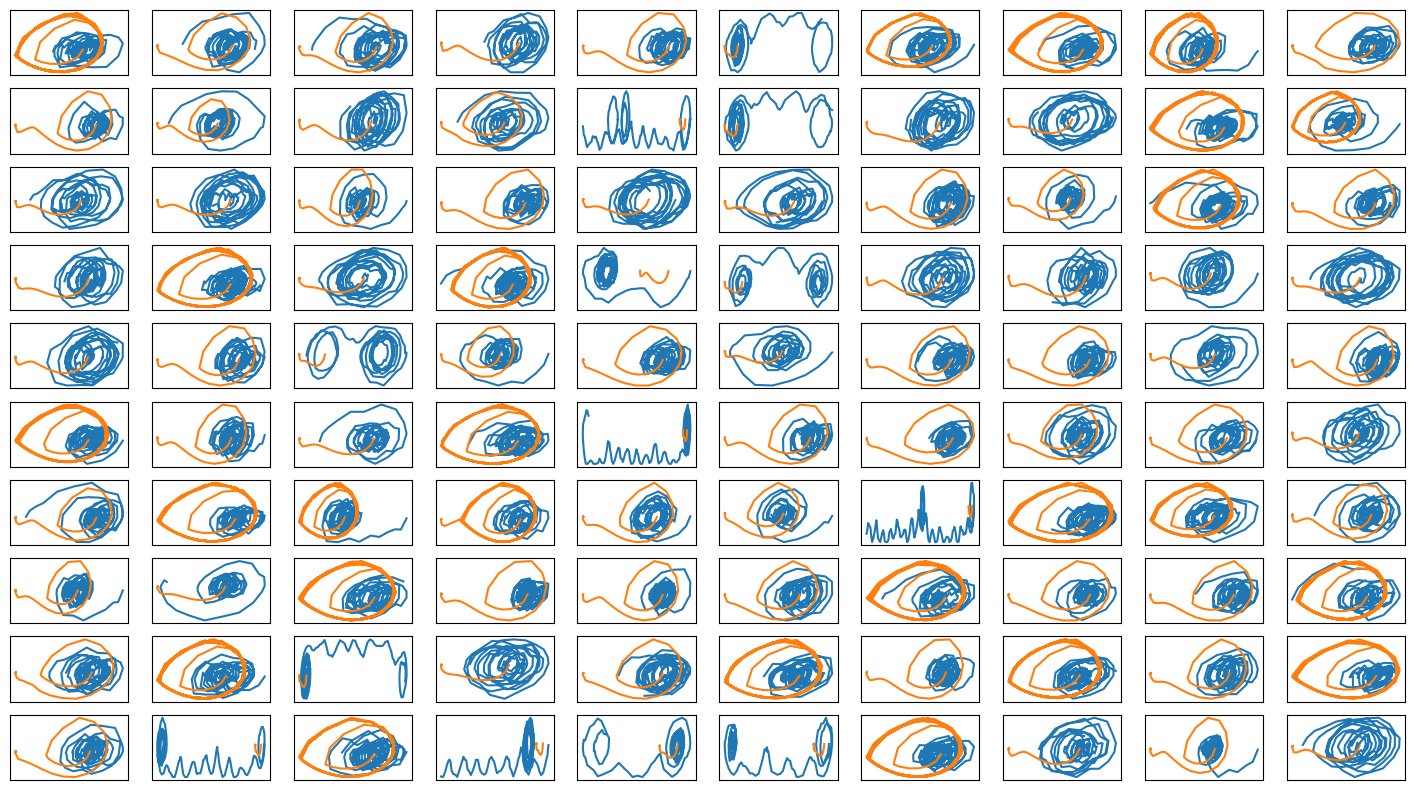

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

train_weighted_vae: enc_dec
train: iter 0  trainloss 1607392.48307  validloss 1491.04003±0.00000  bestvalidloss 1491.04003  last_update 0
train: iter 1  trainloss 606.12393  validloss 485.96076±0.00000  bestvalidloss 485.96076  last_update 0
train: iter 2  trainloss 490.11660  validloss 477.82730±0.00000  bestvalidloss 477.82730  last_update 0
train: iter 3  trainloss 474.13300  validloss 476.91622±0.00000  bestvalidloss 476.91622  last_update 0
train: iter 4  trainloss 462.92298  validloss 464.36157±0.00000  bestvalidloss 464.36157  last_update 0
train: iter 5  trainloss 491.01833  validloss 451.41206±0.00000  bestvalidloss 451.41206  last_update 0
train: iter 6  trainloss 457.60270  validloss 445.39575±0.00000  bestvalidloss 445.39575  last_update 0
train: iter 7  trainloss 460.50419  validloss 442.08346±0.00000  bestvalidloss 442.08346  last_update 0
train: iter 8  trainloss 442.86573  validloss 439.78797±0.00000  bestvalidloss 439.78797  last_update 0
train: iter 9  trainloss 452.1

train: iter 78  trainloss -157.33694  validloss -140.05164±0.00000  bestvalidloss -140.05164  last_update 0
train: iter 79  trainloss -167.15883  validloss -151.03697±0.00000  bestvalidloss -151.03697  last_update 0
train: iter 80  trainloss -178.40032  validloss -159.94055±0.00000  bestvalidloss -159.94055  last_update 0
train: iter 81  trainloss -183.67487  validloss -154.66454±0.00000  bestvalidloss -159.94055  last_update 1
train: iter 82  trainloss -191.89735  validloss -179.13336±0.00000  bestvalidloss -179.13336  last_update 0
train: iter 83  trainloss -201.31620  validloss -114.57957±0.00000  bestvalidloss -179.13336  last_update 1
train: iter 84  trainloss -212.58181  validloss -173.35119±0.00000  bestvalidloss -179.13336  last_update 2
train: iter 85  trainloss -210.79791  validloss -191.62338±0.00000  bestvalidloss -191.62338  last_update 0
train: iter 86  trainloss -220.97083  validloss -199.02081±0.00000  bestvalidloss -199.02081  last_update 0
train: iter 87  trainloss -2

train: iter 155  trainloss -554.52248  validloss -536.95253±0.00000  bestvalidloss -536.95253  last_update 0
train: iter 156  trainloss -555.15592  validloss -521.83951±0.00000  bestvalidloss -536.95253  last_update 1
train: iter 157  trainloss -557.53358  validloss -550.06265±0.00000  bestvalidloss -550.06265  last_update 0
train: iter 158  trainloss -555.70580  validloss -557.40537±0.00000  bestvalidloss -557.40537  last_update 0
train: iter 159  trainloss -571.64901  validloss -550.70358±0.00000  bestvalidloss -557.40537  last_update 1
train: iter 160  trainloss -574.88943  validloss -556.39351±0.00000  bestvalidloss -557.40537  last_update 2
train: iter 161  trainloss -573.95355  validloss -551.33552±0.00000  bestvalidloss -557.40537  last_update 3
train: iter 162  trainloss -574.61172  validloss -560.23139±0.00000  bestvalidloss -560.23139  last_update 0
train: iter 163  trainloss -582.85360  validloss -572.36683±0.00000  bestvalidloss -572.36683  last_update 0
train: iter 164  tr

train: iter 231  trainloss -665.16038  validloss -583.54630±0.00000  bestvalidloss -633.78755  last_update 19
train: iter 232  trainloss -668.49314  validloss -627.95825±0.00000  bestvalidloss -633.78755  last_update 20
train: iter 233  trainloss -649.01431  validloss -627.28386±0.00000  bestvalidloss -633.78755  last_update 21
train: iter 234  trainloss -629.95141  validloss -602.12958±0.00000  bestvalidloss -633.78755  last_update 22
train: iter 235  trainloss -653.39408  validloss -609.43682±0.00000  bestvalidloss -633.78755  last_update 23
train: iter 236  trainloss -644.23737  validloss -614.12823±0.00000  bestvalidloss -633.78755  last_update 24
train: iter 237  trainloss -662.24121  validloss -613.39266±0.00000  bestvalidloss -633.78755  last_update 25
train: iter 238  trainloss -668.76173  validloss -629.39957±0.00000  bestvalidloss -633.78755  last_update 26
train: iter 239  trainloss -672.14215  validloss -634.06255±0.00000  bestvalidloss -634.06255  last_update 0
train: iter

train: iter 306  trainloss -590.76981  validloss -570.39433±0.00000  bestvalidloss -666.17645  last_update 14
train: iter 307  trainloss -661.28157  validloss -609.35550±0.00000  bestvalidloss -666.17645  last_update 15
train: iter 308  trainloss -677.71017  validloss -612.75760±0.00000  bestvalidloss -666.17645  last_update 16
train: iter 309  trainloss -684.28288  validloss -595.19503±0.00000  bestvalidloss -666.17645  last_update 17
train: iter 310  trainloss -675.93918  validloss -620.72782±0.00000  bestvalidloss -666.17645  last_update 18
train: iter 311  trainloss -655.75930  validloss -589.47126±0.00000  bestvalidloss -666.17645  last_update 19
train: iter 312  trainloss -677.21618  validloss -612.16620±0.00000  bestvalidloss -666.17645  last_update 20
train: iter 313  trainloss -664.87008  validloss -633.91358±0.00000  bestvalidloss -666.17645  last_update 21
train: iter 314  trainloss -687.88901  validloss -632.80486±0.00000  bestvalidloss -666.17645  last_update 22
train: ite

train: iter 381  trainloss -708.87906  validloss -672.02041±0.00000  bestvalidloss -679.55172  last_update 6
train: iter 382  trainloss -716.15386  validloss -670.97087±0.00000  bestvalidloss -679.55172  last_update 7
train: iter 383  trainloss -707.31040  validloss -671.69624±0.00000  bestvalidloss -679.55172  last_update 8
train: iter 384  trainloss -715.82579  validloss -680.34936±0.00000  bestvalidloss -680.34936  last_update 0
train: iter 385  trainloss -681.27434  validloss -681.14232±0.00000  bestvalidloss -681.14232  last_update 0
train: iter 386  trainloss -698.30811  validloss -649.83408±0.00000  bestvalidloss -681.14232  last_update 1
train: iter 387  trainloss -705.66894  validloss -629.13600±0.00000  bestvalidloss -681.14232  last_update 2
train: iter 388  trainloss -708.83097  validloss -685.00268±0.00000  bestvalidloss -685.00268  last_update 0
train: iter 389  trainloss -675.09613  validloss -684.47739±0.00000  bestvalidloss -685.00268  last_update 1
train: iter 390  tr

train: iter 456  trainloss -727.52164  validloss -669.46062±0.00000  bestvalidloss -688.11246  last_update 31
train: iter 457  trainloss -721.68738  validloss -684.45358±0.00000  bestvalidloss -688.11246  last_update 32
train: iter 458  trainloss -709.60377  validloss -692.31917±0.00000  bestvalidloss -692.31917  last_update 0
train: iter 459  trainloss -701.40424  validloss -669.62235±0.00000  bestvalidloss -692.31917  last_update 1
train: iter 460  trainloss -712.10335  validloss -657.05311±0.00000  bestvalidloss -692.31917  last_update 2
train: iter 461  trainloss -674.21115  validloss -646.28646±0.00000  bestvalidloss -692.31917  last_update 3
train: iter 462  trainloss -701.73899  validloss -625.27899±0.00000  bestvalidloss -692.31917  last_update 4
train: iter 463  trainloss -714.04479  validloss -666.28888±0.00000  bestvalidloss -692.31917  last_update 5
train: iter 464  trainloss -718.63705  validloss -685.33512±0.00000  bestvalidloss -692.31917  last_update 6
train: iter 465  

train: iter 531  trainloss -701.40472  validloss -605.56593±0.00000  bestvalidloss -697.36441  last_update 34
train: iter 532  trainloss -714.31721  validloss -670.31167±0.00000  bestvalidloss -697.36441  last_update 35
train: iter 533  trainloss -724.66344  validloss -661.63837±0.00000  bestvalidloss -697.36441  last_update 36
train: iter 534  trainloss -719.38488  validloss -672.71951±0.00000  bestvalidloss -697.36441  last_update 37
train: iter 535  trainloss -729.40621  validloss -681.16415±0.00000  bestvalidloss -697.36441  last_update 38
train: iter 536  trainloss -642.50899  validloss -505.08226±0.00000  bestvalidloss -697.36441  last_update 39
train: iter 537  trainloss -698.91848  validloss -640.23827±0.00000  bestvalidloss -697.36441  last_update 40
train: iter 538  trainloss -714.52278  validloss -668.49112±0.00000  bestvalidloss -697.36441  last_update 41
train: iter 539  trainloss -673.48886  validloss -598.60991±0.00000  bestvalidloss -697.36441  last_update 42
train: ite

train: iter 606  trainloss -736.27784  validloss -699.94219±0.00000  bestvalidloss -712.36522  last_update 4
train: iter 607  trainloss -721.95361  validloss -701.71779±0.00000  bestvalidloss -712.36522  last_update 5
train: iter 608  trainloss -739.47487  validloss -669.32309±0.00000  bestvalidloss -712.36522  last_update 6
train: iter 609  trainloss -707.66909  validloss -695.20330±0.00000  bestvalidloss -712.36522  last_update 7
train: iter 610  trainloss -720.24391  validloss -639.87293±0.00000  bestvalidloss -712.36522  last_update 8
train: iter 611  trainloss -738.93460  validloss -700.20552±0.00000  bestvalidloss -712.36522  last_update 9
train: iter 612  trainloss -739.16295  validloss -674.78409±0.00000  bestvalidloss -712.36522  last_update 10
train: iter 613  trainloss -711.56012  validloss -681.41331±0.00000  bestvalidloss -712.36522  last_update 11
train: iter 614  trainloss -720.04589  validloss -698.53576±0.00000  bestvalidloss -712.36522  last_update 12
train: iter 615 

train: iter 681  trainloss -737.14648  validloss -656.79516±0.00000  bestvalidloss -712.84158  last_update 57
train: iter 682  trainloss -738.53141  validloss -701.29874±0.00000  bestvalidloss -712.84158  last_update 58
train: iter 683  trainloss -749.37495  validloss -636.05067±0.00000  bestvalidloss -712.84158  last_update 59
train: iter 684  trainloss -709.83932  validloss -691.85907±0.00000  bestvalidloss -712.84158  last_update 60
train: iter 685  trainloss -707.70726  validloss -653.40658±0.00000  bestvalidloss -712.84158  last_update 61
train: iter 686  trainloss -738.96093  validloss -657.32782±0.00000  bestvalidloss -712.84158  last_update 62
train: iter 687  trainloss -740.10665  validloss -677.21355±0.00000  bestvalidloss -712.84158  last_update 63
train: iter 688  trainloss -757.04631  validloss -692.33245±0.00000  bestvalidloss -712.84158  last_update 64
train: iter 689  trainloss -747.54431  validloss -715.52350±0.00000  bestvalidloss -715.52350  last_update 0
train: iter

train: iter 756  trainloss -756.56828  validloss -689.66538±0.00000  bestvalidloss -716.50215  last_update 58
train: iter 757  trainloss -759.19412  validloss -693.03762±0.00000  bestvalidloss -716.50215  last_update 59
train: iter 758  trainloss -752.53967  validloss -700.19074±0.00000  bestvalidloss -716.50215  last_update 60
train: iter 759  trainloss -739.46224  validloss -675.43550±0.00000  bestvalidloss -716.50215  last_update 61
train: iter 760  trainloss -758.66920  validloss -682.83780±0.00000  bestvalidloss -716.50215  last_update 62
train: iter 761  trainloss -711.52249  validloss -683.01898±0.00000  bestvalidloss -716.50215  last_update 63
train: iter 762  trainloss -754.53145  validloss -663.98658±0.00000  bestvalidloss -716.50215  last_update 64
train: iter 763  trainloss -753.14547  validloss -699.50685±0.00000  bestvalidloss -716.50215  last_update 65
train: iter 764  trainloss -747.67991  validloss -698.59578±0.00000  bestvalidloss -716.50215  last_update 66
train: ite

train: iter 831  trainloss -761.61841  validloss -705.73559±0.00000  bestvalidloss -726.93329  last_update 21
train: iter 832  trainloss -761.04007  validloss -680.15392±0.00000  bestvalidloss -726.93329  last_update 22
train: iter 833  trainloss -754.78479  validloss -705.53418±0.00000  bestvalidloss -726.93329  last_update 23
train: iter 834  trainloss -759.21988  validloss -704.96495±0.00000  bestvalidloss -726.93329  last_update 24
train: iter 835  trainloss -757.48641  validloss -717.72491±0.00000  bestvalidloss -726.93329  last_update 25
train: iter 836  trainloss -754.26740  validloss -687.86215±0.00000  bestvalidloss -726.93329  last_update 26
train: iter 837  trainloss -743.71916  validloss -714.97061±0.00000  bestvalidloss -726.93329  last_update 27
train: iter 838  trainloss -754.98846  validloss -693.39794±0.00000  bestvalidloss -726.93329  last_update 28
train: iter 839  trainloss -768.87747  validloss -718.94540±0.00000  bestvalidloss -726.93329  last_update 29
train: ite

train: iter 906  trainloss -737.46906  validloss -683.03184±0.00000  bestvalidloss -742.14253  last_update 19
train: iter 907  trainloss -731.51050  validloss -677.88625±0.00000  bestvalidloss -742.14253  last_update 20
train: iter 908  trainloss -736.34334  validloss -570.03546±0.00000  bestvalidloss -742.14253  last_update 21
train: iter 909  trainloss -772.84643  validloss -735.05924±0.00000  bestvalidloss -742.14253  last_update 22
train: iter 910  trainloss -778.83050  validloss -725.35087±0.00000  bestvalidloss -742.14253  last_update 23
train: iter 911  trainloss -778.63155  validloss -706.40584±0.00000  bestvalidloss -742.14253  last_update 24
train: iter 912  trainloss -713.01244  validloss -702.58400±0.00000  bestvalidloss -742.14253  last_update 25
train: iter 913  trainloss -752.96902  validloss -723.62003±0.00000  bestvalidloss -742.14253  last_update 26
train: iter 914  trainloss -750.75665  validloss -687.75053±0.00000  bestvalidloss -742.14253  last_update 27
train: ite

train: iter 982  trainloss -764.31388  validloss -739.19187±0.00000  bestvalidloss -752.45802  last_update 6
train: iter 983  trainloss -790.15493  validloss -746.05838±0.00000  bestvalidloss -752.45802  last_update 7
train: iter 984  trainloss -787.06342  validloss -743.79124±0.00000  bestvalidloss -752.45802  last_update 8
train: iter 985  trainloss -762.39346  validloss -742.64987±0.00000  bestvalidloss -752.45802  last_update 9
train: iter 986  trainloss -786.70991  validloss -747.24327±0.00000  bestvalidloss -752.45802  last_update 10
train: iter 987  trainloss -746.03943  validloss -741.42317±0.00000  bestvalidloss -752.45802  last_update 11
train: iter 988  trainloss -773.55984  validloss -704.92299±0.00000  bestvalidloss -752.45802  last_update 12
train: iter 989  trainloss -789.28235  validloss -745.00893±0.00000  bestvalidloss -752.45802  last_update 13
train: iter 990  trainloss -777.70065  validloss -688.07685±0.00000  bestvalidloss -752.45802  last_update 14
train: iter 99

train: iter 1058  trainloss -779.98295  validloss -746.52222±0.00000  bestvalidloss -769.47496  last_update 11
train: iter 1059  trainloss -783.85459  validloss -752.58283±0.00000  bestvalidloss -769.47496  last_update 12
train: iter 1060  trainloss -788.19660  validloss -759.41507±0.00000  bestvalidloss -769.47496  last_update 13
train: iter 1061  trainloss -789.71431  validloss -719.75763±0.00000  bestvalidloss -769.47496  last_update 14
train: iter 1062  trainloss -790.46732  validloss -754.72015±0.00000  bestvalidloss -769.47496  last_update 15
train: iter 1063  trainloss -784.44588  validloss -728.16299±0.00000  bestvalidloss -769.47496  last_update 16
train: iter 1064  trainloss -794.44492  validloss -760.20746±0.00000  bestvalidloss -769.47496  last_update 17
train: iter 1065  trainloss -801.38962  validloss -739.21564±0.00000  bestvalidloss -769.47496  last_update 18
train: iter 1066  trainloss -791.72050  validloss -757.78216±0.00000  bestvalidloss -769.47496  last_update 19
t

train: iter 1134  trainloss -840.03337  validloss -747.80693±0.00000  bestvalidloss -807.18719  last_update 5
train: iter 1135  trainloss -834.21744  validloss -785.48830±0.00000  bestvalidloss -807.18719  last_update 6
train: iter 1136  trainloss -847.81879  validloss -787.32346±0.00000  bestvalidloss -807.18719  last_update 7
train: iter 1137  trainloss -796.22645  validloss -740.31371±0.00000  bestvalidloss -807.18719  last_update 8
train: iter 1138  trainloss -836.70001  validloss -795.45117±0.00000  bestvalidloss -807.18719  last_update 9
train: iter 1139  trainloss -841.25830  validloss -800.23535±0.00000  bestvalidloss -807.18719  last_update 10
train: iter 1140  trainloss -822.04824  validloss -782.88493±0.00000  bestvalidloss -807.18719  last_update 11
train: iter 1141  trainloss -849.03796  validloss -787.78612±0.00000  bestvalidloss -807.18719  last_update 12
train: iter 1142  trainloss -858.08855  validloss -809.64236±0.00000  bestvalidloss -809.64236  last_update 0
train: 

train: iter 1211  trainloss -832.70018  validloss -797.70122±0.00000  bestvalidloss -835.87764  last_update 13
train: iter 1212  trainloss -792.91820  validloss -646.96589±0.00000  bestvalidloss -835.87764  last_update 14
train: iter 1213  trainloss -829.22964  validloss -805.89196±0.00000  bestvalidloss -835.87764  last_update 15
train: iter 1214  trainloss -858.47670  validloss -802.79097±0.00000  bestvalidloss -835.87764  last_update 16
train: iter 1215  trainloss -851.53839  validloss -786.58740±0.00000  bestvalidloss -835.87764  last_update 17
train: iter 1216  trainloss -858.30658  validloss -790.89713±0.00000  bestvalidloss -835.87764  last_update 18
train: iter 1217  trainloss -860.06096  validloss -821.99829±0.00000  bestvalidloss -835.87764  last_update 19
train: iter 1218  trainloss -868.37920  validloss -806.15268±0.00000  bestvalidloss -835.87764  last_update 20
train: iter 1219  trainloss -853.79525  validloss -828.23132±0.00000  bestvalidloss -835.87764  last_update 21
t

train: iter 1286  trainloss -881.03266  validloss -811.21674±0.00000  bestvalidloss -843.77141  last_update 14
train: iter 1287  trainloss -870.47420  validloss -817.55898±0.00000  bestvalidloss -843.77141  last_update 15
train: iter 1288  trainloss -837.76089  validloss -842.13208±0.00000  bestvalidloss -843.77141  last_update 16
train: iter 1289  trainloss -845.73179  validloss -802.44609±0.00000  bestvalidloss -843.77141  last_update 17
train: iter 1290  trainloss -871.76977  validloss -851.94900±0.00000  bestvalidloss -851.94900  last_update 0
train: iter 1291  trainloss -875.79528  validloss -753.08194±0.00000  bestvalidloss -851.94900  last_update 1
train: iter 1292  trainloss -884.11967  validloss -831.62426±0.00000  bestvalidloss -851.94900  last_update 2
train: iter 1293  trainloss -874.97773  validloss -721.74419±0.00000  bestvalidloss -851.94900  last_update 3
train: iter 1294  trainloss -838.96543  validloss -773.71176±0.00000  bestvalidloss -851.94900  last_update 4
train:

train: iter 1361  trainloss -865.74617  validloss -831.01122±0.00000  bestvalidloss -869.13766  last_update 1
train: iter 1362  trainloss -855.92245  validloss -846.93400±0.00000  bestvalidloss -869.13766  last_update 2
train: iter 1363  trainloss -891.32584  validloss -839.45711±0.00000  bestvalidloss -869.13766  last_update 3
train: iter 1364  trainloss -880.94965  validloss -844.45532±0.00000  bestvalidloss -869.13766  last_update 4
train: iter 1365  trainloss -849.43842  validloss -789.62182±0.00000  bestvalidloss -869.13766  last_update 5
train: iter 1366  trainloss -884.59322  validloss -831.48994±0.00000  bestvalidloss -869.13766  last_update 6
train: iter 1367  trainloss -885.73528  validloss -814.80448±0.00000  bestvalidloss -869.13766  last_update 7
train: iter 1368  trainloss -860.42654  validloss -867.42336±0.00000  bestvalidloss -869.13766  last_update 8
train: iter 1369  trainloss -898.23548  validloss -861.98284±0.00000  bestvalidloss -869.13766  last_update 9
train: ite

train: iter 1437  trainloss -884.31659  validloss -853.69229±0.00000  bestvalidloss -880.67842  last_update 18
train: iter 1438  trainloss -891.39574  validloss -839.82304±0.00000  bestvalidloss -880.67842  last_update 19
train: iter 1439  trainloss -891.38186  validloss -797.74019±0.00000  bestvalidloss -880.67842  last_update 20
train: iter 1440  trainloss -885.70389  validloss -822.27575±0.00000  bestvalidloss -880.67842  last_update 21
train: iter 1441  trainloss -896.66298  validloss -871.84821±0.00000  bestvalidloss -880.67842  last_update 22
train: iter 1442  trainloss -884.32727  validloss -889.39813±0.00000  bestvalidloss -889.39813  last_update 0
train: iter 1443  trainloss -883.72186  validloss -876.68680±0.00000  bestvalidloss -889.39813  last_update 1
train: iter 1444  trainloss -875.48537  validloss -847.78403±0.00000  bestvalidloss -889.39813  last_update 2
train: iter 1445  trainloss -899.20338  validloss -868.09493±0.00000  bestvalidloss -889.39813  last_update 3
train

train: iter 1512  trainloss -851.75672  validloss -843.12931±0.00000  bestvalidloss -901.22152  last_update 23
train: iter 1513  trainloss -901.59744  validloss -885.91416±0.00000  bestvalidloss -901.22152  last_update 24
train: iter 1514  trainloss -913.41798  validloss -872.98134±0.00000  bestvalidloss -901.22152  last_update 25
train: iter 1515  trainloss -872.21307  validloss -889.61230±0.00000  bestvalidloss -901.22152  last_update 26
train: iter 1516  trainloss -908.84980  validloss -878.02468±0.00000  bestvalidloss -901.22152  last_update 27
train: iter 1517  trainloss -824.21010  validloss -884.20685±0.00000  bestvalidloss -901.22152  last_update 28
train: iter 1518  trainloss -909.17008  validloss -873.70329±0.00000  bestvalidloss -901.22152  last_update 29
train: iter 1519  trainloss -886.29403  validloss -883.35295±0.00000  bestvalidloss -901.22152  last_update 30
train: iter 1520  trainloss -905.54431  validloss -850.56141±0.00000  bestvalidloss -901.22152  last_update 31
t

train: iter 1586  trainloss -911.32608  validloss -891.56472±0.00000  bestvalidloss -901.22152  last_update 97
train: iter 1587  trainloss -913.10309  validloss -881.85895±0.00000  bestvalidloss -901.22152  last_update 98
train: iter 1588  trainloss -928.74849  validloss -828.26924±0.00000  bestvalidloss -901.22152  last_update 99
train: iter 1589  trainloss -896.53884  validloss -819.93637±0.00000  bestvalidloss -901.22152  last_update 100
train: fin


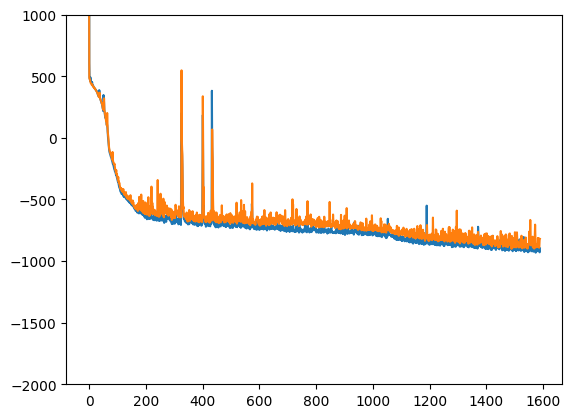

train_weighted_vae: enc
train: iter 0  trainloss -912.25953  validloss -891.17018±0.00000  bestvalidloss -891.17018  last_update 0
train: iter 1  trainloss -915.16071  validloss -885.39032±0.00000  bestvalidloss -891.17018  last_update 1
train: iter 2  trainloss -921.87541  validloss -852.68808±0.00000  bestvalidloss -891.17018  last_update 2
train: iter 3  trainloss -912.92174  validloss -892.12641±0.00000  bestvalidloss -892.12641  last_update 0
train: iter 4  trainloss -927.11502  validloss -887.90398±0.00000  bestvalidloss -892.12641  last_update 1
train: iter 5  trainloss -908.95364  validloss -861.38023±0.00000  bestvalidloss -892.12641  last_update 2
train: iter 6  trainloss -910.20458  validloss -798.27519±0.00000  bestvalidloss -892.12641  last_update 3
train: iter 7  trainloss -918.03356  validloss -861.34825±0.00000  bestvalidloss -892.12641  last_update 4
train: iter 8  trainloss -916.23796  validloss -891.44692±0.00000  bestvalidloss -892.12641  last_update 5
train: iter 9

train: iter 76  trainloss -910.03369  validloss -897.84988±0.00000  bestvalidloss -898.94782  last_update 2
train: iter 77  trainloss -922.91728  validloss -857.90164±0.00000  bestvalidloss -898.94782  last_update 3
train: iter 78  trainloss -920.86140  validloss -857.98740±0.00000  bestvalidloss -898.94782  last_update 4
train: iter 79  trainloss -922.10534  validloss -892.80416±0.00000  bestvalidloss -898.94782  last_update 5
train: iter 80  trainloss -917.43572  validloss -897.62724±0.00000  bestvalidloss -898.94782  last_update 6
train: iter 81  trainloss -924.62829  validloss -880.33989±0.00000  bestvalidloss -898.94782  last_update 7
train: iter 82  trainloss -919.87771  validloss -887.15571±0.00000  bestvalidloss -898.94782  last_update 8
train: iter 83  trainloss -928.58198  validloss -875.82127±0.00000  bestvalidloss -898.94782  last_update 9
train: iter 84  trainloss -928.94519  validloss -872.46427±0.00000  bestvalidloss -898.94782  last_update 10
train: iter 85  trainloss -

train: iter 153  trainloss -906.70382  validloss -811.30622±0.00000  bestvalidloss -902.08860  last_update 52
train: iter 154  trainloss -926.59234  validloss -869.19093±0.00000  bestvalidloss -902.08860  last_update 53
train: iter 155  trainloss -913.54073  validloss -879.53265±0.00000  bestvalidloss -902.08860  last_update 54
train: iter 156  trainloss -934.42769  validloss -890.40274±0.00000  bestvalidloss -902.08860  last_update 55
train: iter 157  trainloss -927.04316  validloss -829.45434±0.00000  bestvalidloss -902.08860  last_update 56
train: iter 158  trainloss -922.46296  validloss -890.60815±0.00000  bestvalidloss -902.08860  last_update 57
train: iter 159  trainloss -926.74407  validloss -885.96568±0.00000  bestvalidloss -902.08860  last_update 58
train: iter 160  trainloss -928.16462  validloss -889.05748±0.00000  bestvalidloss -902.08860  last_update 59
train: iter 161  trainloss -922.90986  validloss -853.36951±0.00000  bestvalidloss -902.08860  last_update 60
train: ite

train: iter 228  trainloss -929.03847  validloss -890.22631±0.00000  bestvalidloss -902.24730  last_update 31
train: iter 229  trainloss -929.31250  validloss -892.50927±0.00000  bestvalidloss -902.24730  last_update 32
train: iter 230  trainloss -921.30866  validloss -847.97019±0.00000  bestvalidloss -902.24730  last_update 33
train: iter 231  trainloss -918.74155  validloss -873.86005±0.00000  bestvalidloss -902.24730  last_update 34
train: iter 232  trainloss -928.38959  validloss -864.88325±0.00000  bestvalidloss -902.24730  last_update 35
train: iter 233  trainloss -926.93218  validloss -895.06984±0.00000  bestvalidloss -902.24730  last_update 36
train: iter 234  trainloss -930.20107  validloss -872.29615±0.00000  bestvalidloss -902.24730  last_update 37
train: iter 235  trainloss -934.97231  validloss -886.12811±0.00000  bestvalidloss -902.24730  last_update 38
train: iter 236  trainloss -936.22234  validloss -866.61637±0.00000  bestvalidloss -902.24730  last_update 39
train: ite

train: iter 8  trainloss -929.78327  validloss -894.54282±0.00000  bestvalidloss -896.18757  last_update 8
train: iter 9  trainloss -912.81654  validloss -829.09502±0.00000  bestvalidloss -896.18757  last_update 9
train: iter 10  trainloss -919.75960  validloss -812.01750±0.00000  bestvalidloss -896.18757  last_update 10
train: iter 11  trainloss -910.00821  validloss -855.17608±0.00000  bestvalidloss -896.18757  last_update 11
train: iter 12  trainloss -917.29462  validloss -858.49997±0.00000  bestvalidloss -896.18757  last_update 12
train: iter 13  trainloss -925.46365  validloss -887.45524±0.00000  bestvalidloss -896.18757  last_update 13
train: iter 14  trainloss -930.75466  validloss -845.71942±0.00000  bestvalidloss -896.18757  last_update 14
train: iter 15  trainloss -919.99371  validloss -893.05796±0.00000  bestvalidloss -896.18757  last_update 15
train: iter 16  trainloss -890.35368  validloss -838.23979±0.00000  bestvalidloss -896.18757  last_update 16
train: iter 17  trainlo

train: iter 86  trainloss -917.39662  validloss -854.90181±0.00000  bestvalidloss -907.06411  last_update 4
train: iter 87  trainloss -921.73770  validloss -904.80294±0.00000  bestvalidloss -907.06411  last_update 5
train: iter 88  trainloss -933.49447  validloss -849.22221±0.00000  bestvalidloss -907.06411  last_update 6
train: iter 89  trainloss -928.83429  validloss -875.03859±0.00000  bestvalidloss -907.06411  last_update 7
train: iter 90  trainloss -934.03545  validloss -807.44588±0.00000  bestvalidloss -907.06411  last_update 8
train: iter 91  trainloss -928.16149  validloss -884.94149±0.00000  bestvalidloss -907.06411  last_update 9
train: iter 92  trainloss -929.57200  validloss -846.98935±0.00000  bestvalidloss -907.06411  last_update 10
train: iter 93  trainloss -945.86636  validloss -891.02611±0.00000  bestvalidloss -907.06411  last_update 11
train: iter 94  trainloss -920.47182  validloss -884.14305±0.00000  bestvalidloss -907.06411  last_update 12
train: iter 95  trainloss

train: iter 162  trainloss -938.59011  validloss -843.02811±0.00000  bestvalidloss -923.91674  last_update 57
train: iter 163  trainloss -940.35857  validloss -922.29050±0.00000  bestvalidloss -923.91674  last_update 58
train: iter 164  trainloss -957.20862  validloss -891.90018±0.00000  bestvalidloss -923.91674  last_update 59
train: iter 165  trainloss -953.91160  validloss -905.69902±0.00000  bestvalidloss -923.91674  last_update 60
train: iter 166  trainloss -937.52922  validloss -889.55357±0.00000  bestvalidloss -923.91674  last_update 61
train: iter 167  trainloss -951.89697  validloss -879.60562±0.00000  bestvalidloss -923.91674  last_update 62
train: iter 168  trainloss -949.44153  validloss -832.60965±0.00000  bestvalidloss -923.91674  last_update 63
train: iter 169  trainloss -949.49743  validloss -837.03409±0.00000  bestvalidloss -923.91674  last_update 64
train: iter 170  trainloss -948.44614  validloss -815.41741±0.00000  bestvalidloss -923.91674  last_update 65
train: ite

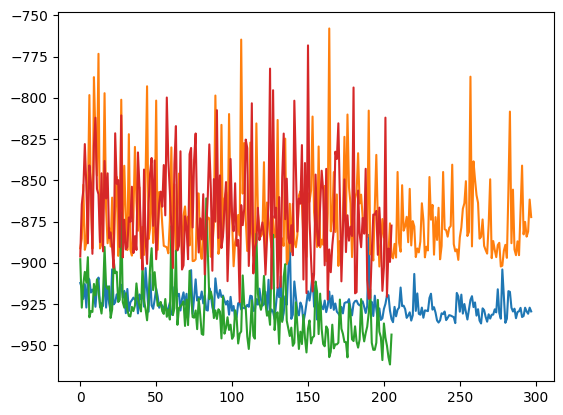

In [9]:
train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=1)
vi.update_mulogvar_offlinedata()
vi.save()
plt.plot(train_curve)
plt.plot(valid_curve)
plt.ylim([-2000, 1000])
plt.show()

train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=2)
vi.update_mulogvar_offlinedata()
vi.save()
plt.plot(train_curve)
plt.plot(valid_curve)
#
#plt.show()

train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=3)
vi.update_mulogvar_offlinedata()
plt.plot(train_curve)
plt.plot(valid_curve)

# y_min = max(-2000, min(max(train_curve),max(valid_curve)))
# y_max = min(1000, max(min(train_curve),min(valid_curve)))
# plt.ylim([y_min, y_max])
plt.show()

vi.save()


In [10]:
vi.load()
vi.update_mulogvar_offlinedata()

load vi_base_ckpt


0  c = 0.20021770810986864
1  c = 0.1983582812192558
2  c = 0.022555950291700478
3  c = 0.20541677419620874
4  c = 0.10100278390403257
5  c = 0.18626578567738697
6  c = 0.05051976271514567
7  c = 0.047219332290270255
8  c = 0.1703964189334006
9  c = 0.14840815680292022
10  c = 0.24494872822400177
11  c = 0.025342155733352467
12  c = 0.29120495159551035
13  c = 0.1062823595846313
14  c = 0.2005682341251094
15  c = 0.2575002131665844
16  c = 0.2478069086585581
17  c = 0.10556652164894924
18  c = 0.1263102409001565
19  c = 0.06421935796424785
20  c = 0.162199131307732
21  c = 0.2946662208960819
22  c = 0.07020726813281049
23  c = 0.15752760672287627
24  c = 0.08439030047625135
25  c = 0.07330712053657978
26  c = 0.1016651025954488
27  c = 0.006908891882512702
28  c = 0.1901597193331265
29  c = 0.1863173542495256
30  c = 0.15759887301895484
31  c = 0.0308689768266279
32  c = 0.24135050248338633
33  c = 0.2181328493603175
34  c = 0.10463073088503207
35  c = 0.04975650100345974
36  c = 0.179

 
実環境方策rollout vs Sim環境方策rollout


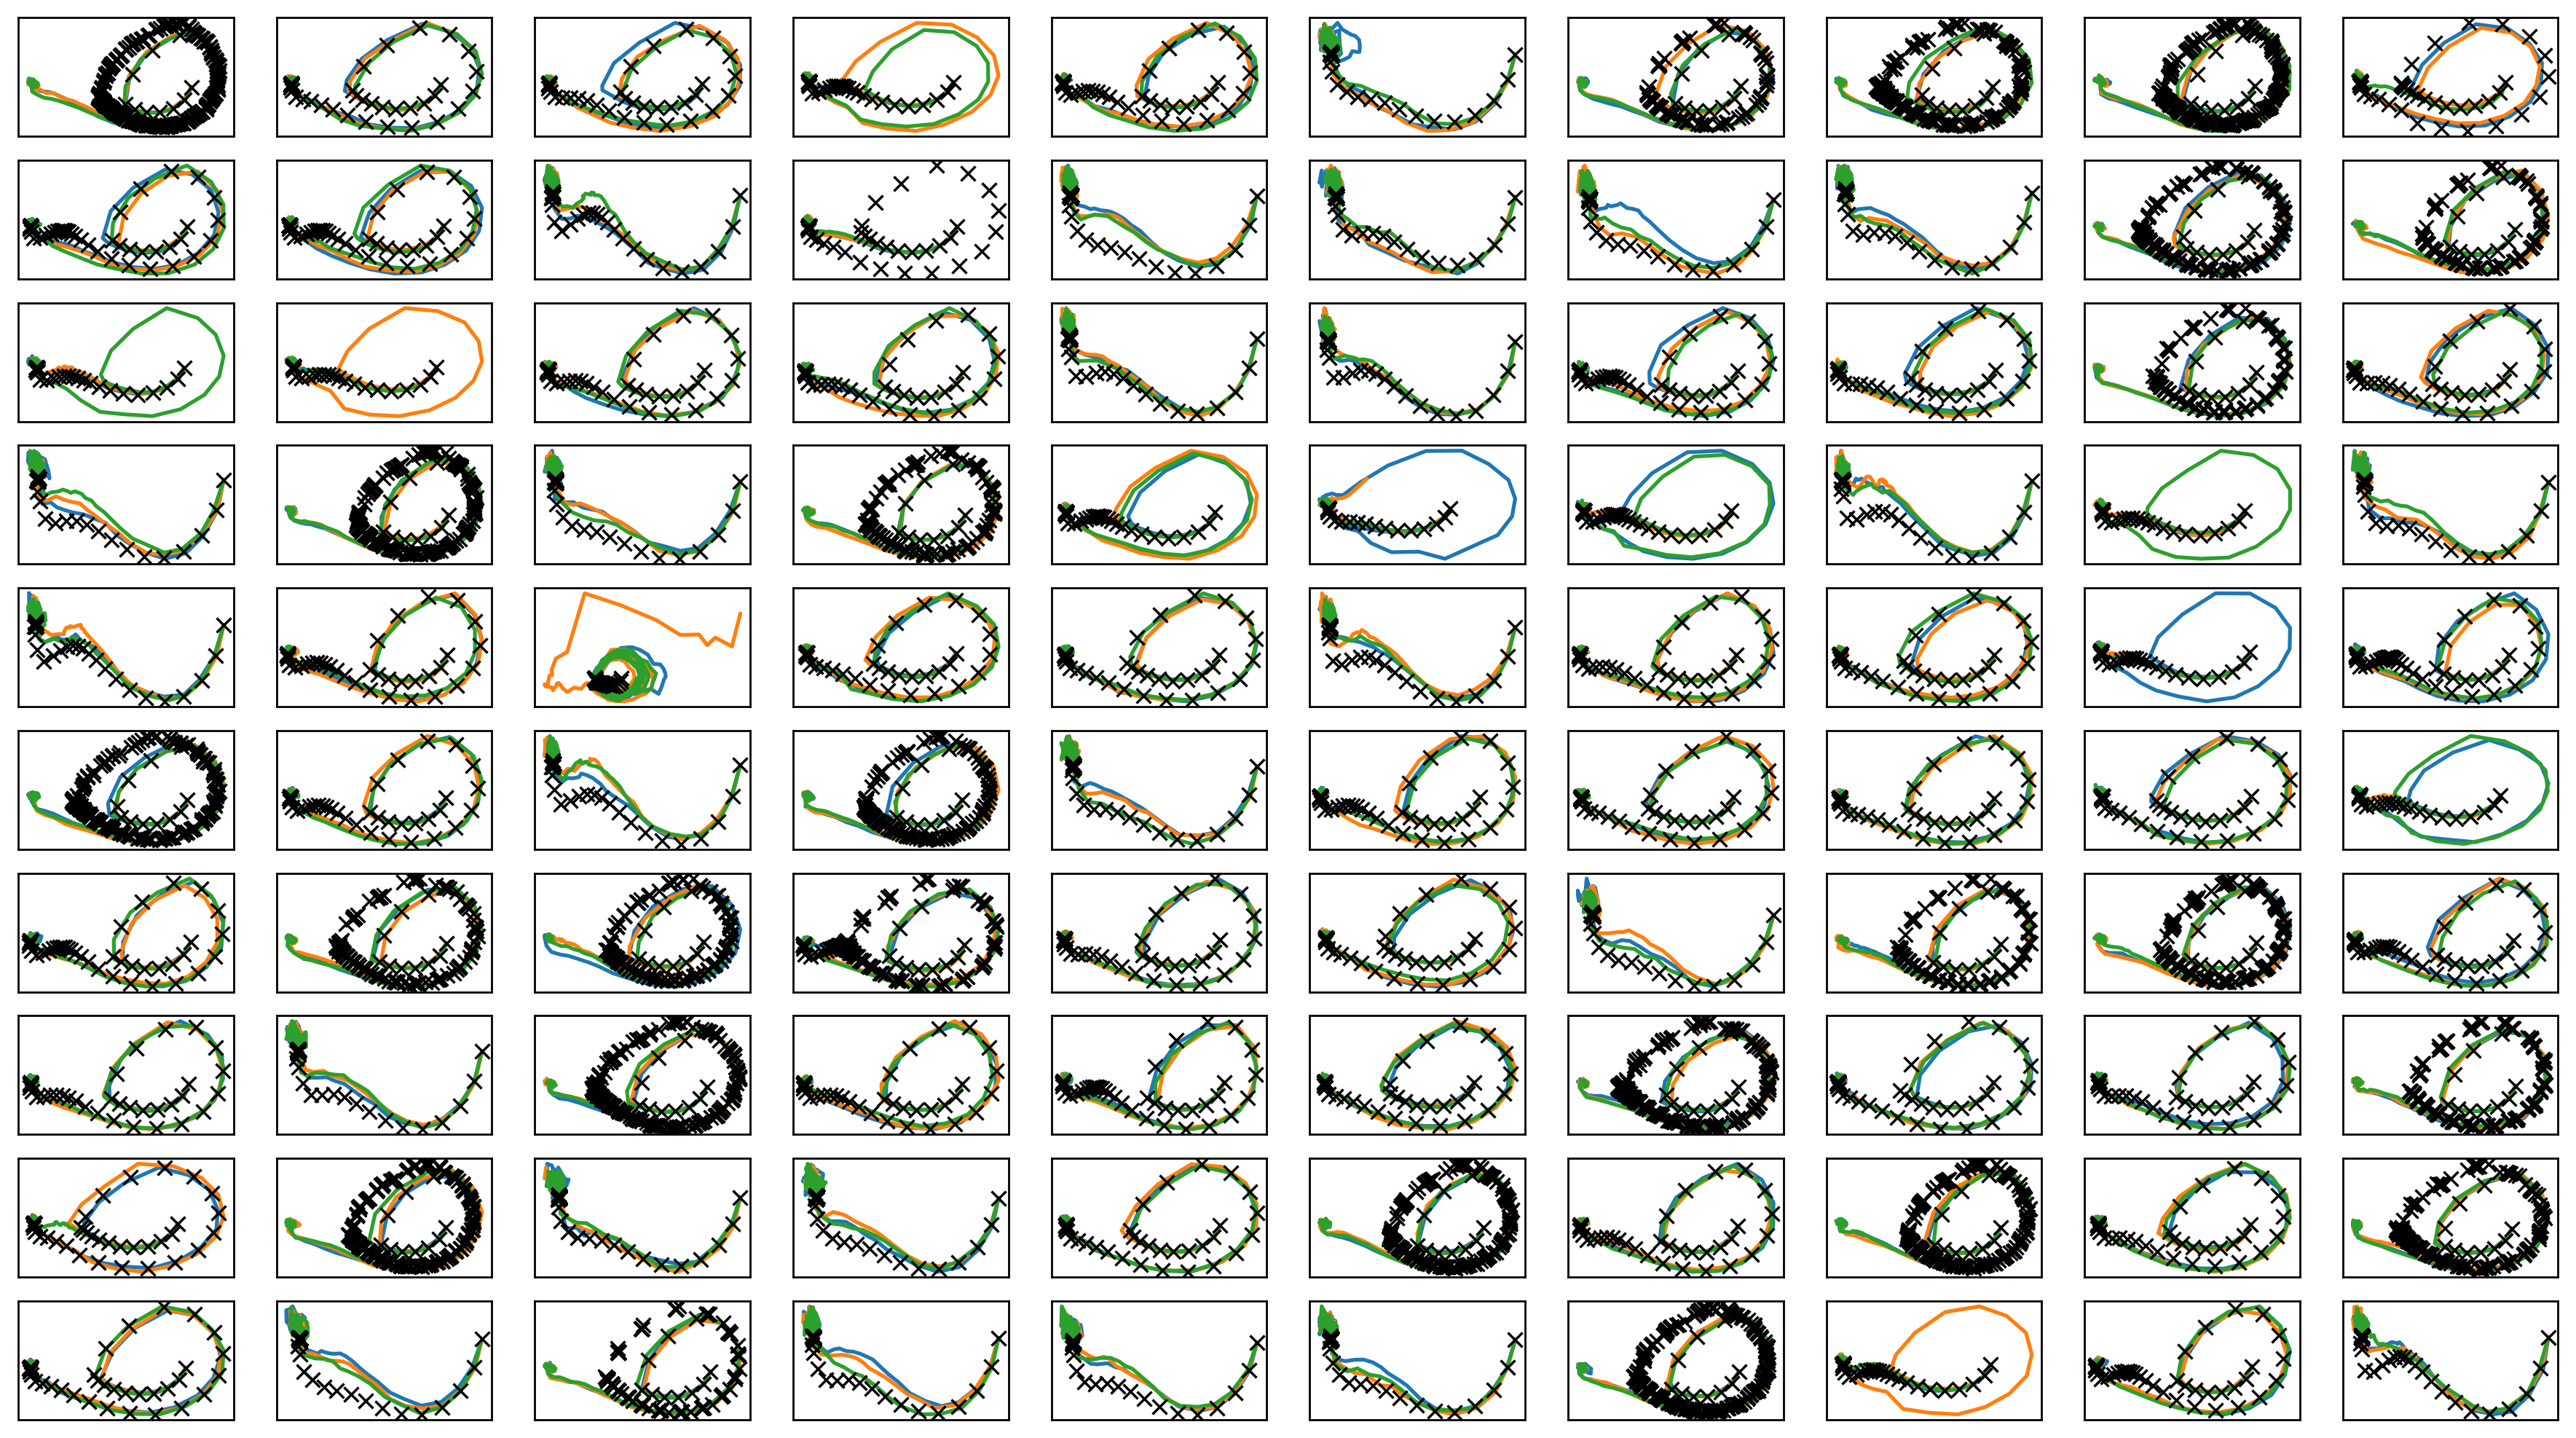

In [11]:
vi.get_sim_rollout_mdppolicy_data_fixlen(update_belief=False)
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen(update_belief=False)
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen(update_belief=False)
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx") 
plt.savefig(figfilenamehead+"two_stage.png")
plt.savefig(figfilenamehead+"two_stage.eps")
plt.savefig(figfilenamehead+"two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

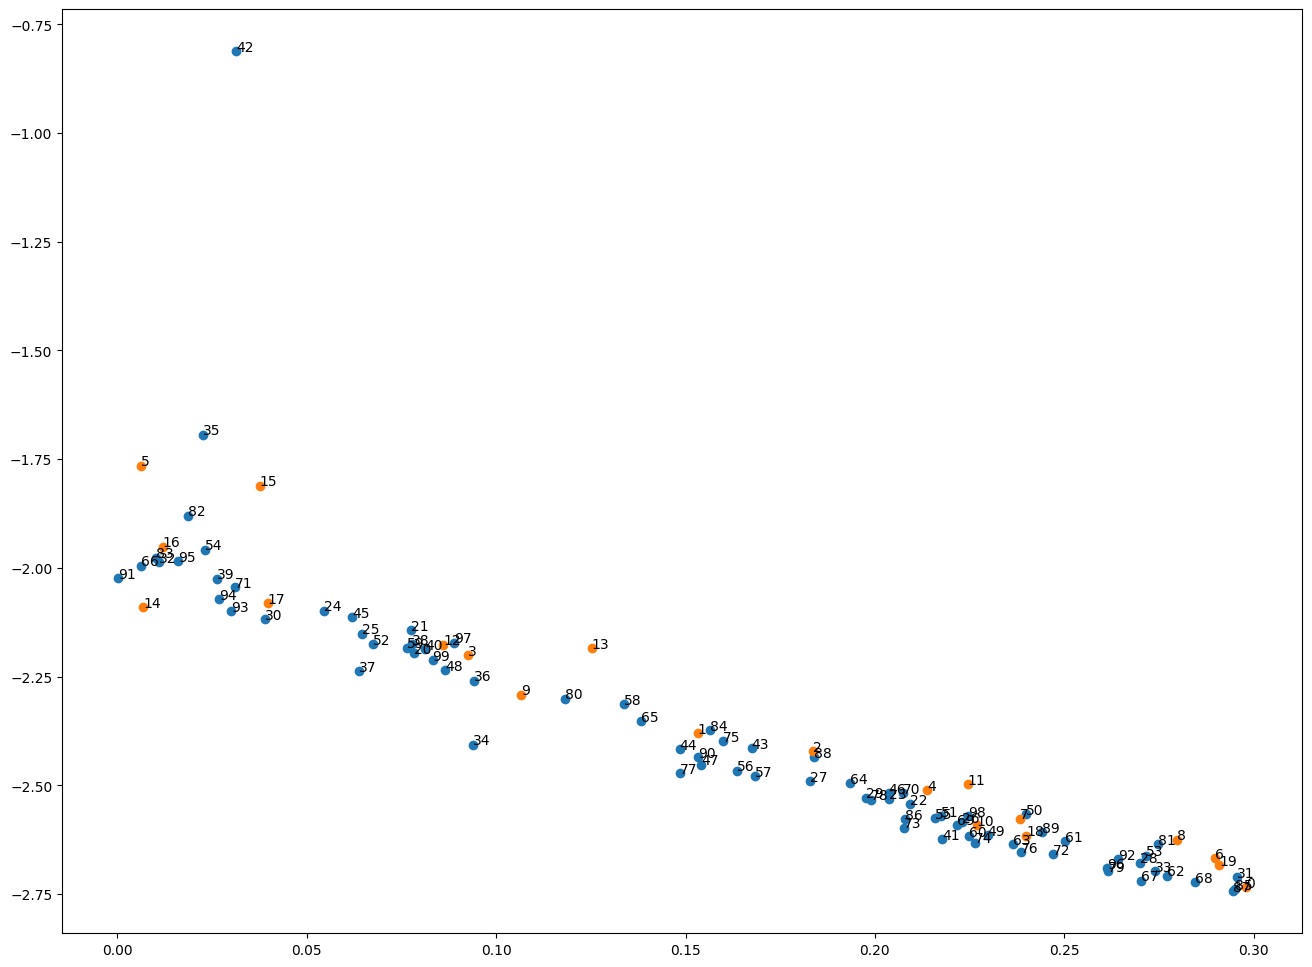

[2.97910163e-01 1.53220826e-01 1.83659868e-01 9.26191816e-02
 2.13844593e-01 6.27837980e-03 2.89779225e-01 2.38265773e-01
 2.79822967e-01 1.06560018e-01 2.26933875e-01 2.24469704e-01
 8.59668072e-02 1.25225228e-01 6.85177675e-03 3.75781305e-02
 1.19629703e-02 3.96666902e-02 2.40024726e-01 2.90920606e-01
 7.83558346e-02 7.74617180e-02 2.09342084e-01 2.03712968e-01
 5.45033670e-02 6.45179456e-02 2.22977599e-01 1.82802197e-01
 2.70079446e-01 1.97623206e-01 3.89891739e-02 2.95551208e-01
 1.09339099e-02 2.73868882e-01 9.39750535e-02 2.24849940e-02
 9.41454935e-02 6.38528531e-02 7.76722308e-02 2.63249718e-02
 8.12571593e-02 2.17703738e-01 3.12692066e-02 1.67437805e-01
 1.48473632e-01 6.20528182e-02 2.03636881e-01 1.54172753e-01
 8.64598938e-02 2.29780458e-01 2.39917584e-01 2.17433570e-01
 6.75730559e-02 2.71498098e-01 2.31935324e-02 2.15892783e-01
 1.63560970e-01 1.68441764e-01 1.33679545e-01 7.63467592e-02
 2.24768216e-01 2.50292794e-01 2.77141700e-01 2.36387227e-01
 1.93330750e-01 1.383419

In [12]:
plt.figure(figsize=(16,12))
np_mulogvar = vi.mulogvar_offlinedata.numpy()

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


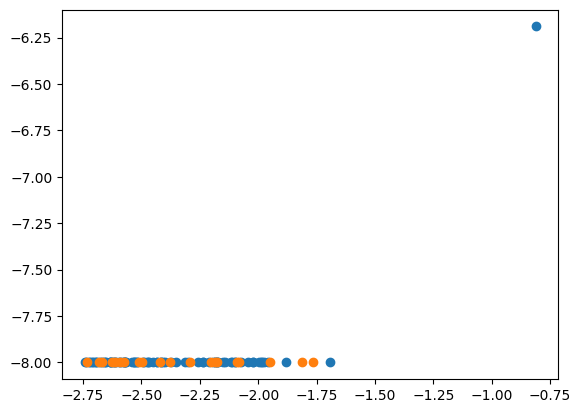

In [13]:
# plt.plot(np_mulogvar[vi.validdata_num:,0],np.exp(0.5*np_mulogvar[vi.validdata_num:,1]), "o")
# plt.plot(np_mulogvar[:vi.validdata_num,0],np.exp(0.5*np_mulogvar[:vi.validdata_num,1]),  "o")
# print("平均-標準偏差")
plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [14]:
print(datetime.datetime.now())

2023-04-12 13:23:00.125696


In [15]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=100)


train: iter 0  trainloss 3.62111  validloss 3.70906±0.00000  bestvalidloss 3.70906  last_update 0
train: iter 1  trainloss 3.31949  validloss 3.37769±0.00000  bestvalidloss 3.37769  last_update 0
train: iter 2  trainloss 3.06411  validloss 3.10538±0.00000  bestvalidloss 3.10538  last_update 0
train: iter 3  trainloss 2.86117  validloss 2.87401±0.00000  bestvalidloss 2.87401  last_update 0
train: iter 4  trainloss 2.68559  validloss 2.68333±0.00000  bestvalidloss 2.68333  last_update 0
train: iter 5  trainloss 2.53438  validloss 2.55357±0.00000  bestvalidloss 2.55357  last_update 0
train: iter 6  trainloss 2.40917  validloss 2.41330±0.00000  bestvalidloss 2.41330  last_update 0
train: iter 7  trainloss 2.30894  validloss 2.31548±0.00000  bestvalidloss 2.31548  last_update 0
train: iter 8  trainloss 2.22219  validloss 2.20745±0.00000  bestvalidloss 2.20745  last_update 0
train: iter 9  trainloss 2.14127  validloss 2.13176±0.00000  bestvalidloss 2.13176  last_update 0
train: iter 10  trai

train: iter 92  trainloss 0.26256  validloss 0.20878±0.00000  bestvalidloss 0.20638  last_update 6
train: iter 93  trainloss 0.24668  validloss 0.20348±0.00000  bestvalidloss 0.20348  last_update 0
train: iter 94  trainloss 0.26518  validloss 0.20664±0.00000  bestvalidloss 0.20348  last_update 1
train: iter 95  trainloss 0.27613  validloss 0.20069±0.00000  bestvalidloss 0.20069  last_update 0
train: iter 96  trainloss 0.24384  validloss 0.20792±0.00000  bestvalidloss 0.20069  last_update 1
train: iter 97  trainloss 0.24253  validloss 0.20670±0.00000  bestvalidloss 0.20069  last_update 2
train: iter 98  trainloss 0.25867  validloss 0.21704±0.00000  bestvalidloss 0.20069  last_update 3
train: iter 99  trainloss 0.24064  validloss 0.20905±0.00000  bestvalidloss 0.20069  last_update 4
train: iter 100  trainloss 0.25658  validloss 0.20640±0.00000  bestvalidloss 0.20069  last_update 5
train: iter 101  trainloss 0.24618  validloss 0.19796±0.00000  bestvalidloss 0.19796  last_update 0
train: i

train: iter 178  trainloss 0.25291  validloss 0.18654±0.00000  bestvalidloss 0.15809  last_update 27
train: iter 179  trainloss 0.25885  validloss 0.18509±0.00000  bestvalidloss 0.15809  last_update 28
train: iter 180  trainloss 0.24388  validloss 0.19322±0.00000  bestvalidloss 0.15809  last_update 29
train: iter 181  trainloss 0.24610  validloss 0.20900±0.00000  bestvalidloss 0.15809  last_update 30
train: iter 182  trainloss 0.24434  validloss 0.19442±0.00000  bestvalidloss 0.15809  last_update 31
train: iter 183  trainloss 0.24932  validloss 0.19687±0.00000  bestvalidloss 0.15809  last_update 32
train: iter 184  trainloss 0.24150  validloss 0.18606±0.00000  bestvalidloss 0.15809  last_update 33
train: iter 185  trainloss 0.23812  validloss 0.18868±0.00000  bestvalidloss 0.15809  last_update 34
train: iter 186  trainloss 0.23412  validloss 0.19093±0.00000  bestvalidloss 0.15809  last_update 35
train: iter 187  trainloss 0.25786  validloss 0.18990±0.00000  bestvalidloss 0.15809  last_

train: iter 267  trainloss 0.25261  validloss 0.20297±0.00000  bestvalidloss 0.15127  last_update 70
train: iter 268  trainloss 0.25907  validloss 0.18582±0.00000  bestvalidloss 0.15127  last_update 71
train: iter 269  trainloss 0.23011  validloss 0.18497±0.00000  bestvalidloss 0.15127  last_update 72
train: iter 270  trainloss 0.25482  validloss 0.19257±0.00000  bestvalidloss 0.15127  last_update 73
train: iter 271  trainloss 0.24685  validloss 0.20485±0.00000  bestvalidloss 0.15127  last_update 74
train: iter 272  trainloss 0.25729  validloss 0.20151±0.00000  bestvalidloss 0.15127  last_update 75
train: iter 273  trainloss 0.24452  validloss 0.19646±0.00000  bestvalidloss 0.15127  last_update 76
train: iter 274  trainloss 0.23344  validloss 0.20553±0.00000  bestvalidloss 0.15127  last_update 77
train: iter 275  trainloss 0.25007  validloss 0.17355±0.00000  bestvalidloss 0.15127  last_update 78
train: iter 276  trainloss 0.24537  validloss 0.19441±0.00000  bestvalidloss 0.15127  last_

In [16]:
print(vi.initial_belief)
vi.save()

Parameter containing:
tensor([-2.3792, -2.3565], requires_grad=True)


In [17]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100)

train: iter 0  trainloss 22.16464  validloss 28.17839±0.00000  bestvalidloss 28.17839  last_update 0
train: iter 1  trainloss 12.59587  validloss 16.93908±0.00000  bestvalidloss 16.93908  last_update 0
train: iter 2  trainloss 7.39112  validloss 10.14128±0.00000  bestvalidloss 10.14128  last_update 0
train: iter 3  trainloss 5.36082  validloss 7.33801±0.00000  bestvalidloss 7.33801  last_update 0
train: iter 4  trainloss 4.43757  validloss 6.19107±0.00000  bestvalidloss 6.19107  last_update 0
train: iter 5  trainloss 3.89576  validloss 5.47440±0.00000  bestvalidloss 5.47440  last_update 0
train: iter 6  trainloss 3.65932  validloss 5.66060±0.00000  bestvalidloss 5.47440  last_update 1
train: iter 7  trainloss 3.57961  validloss 5.09621±0.00000  bestvalidloss 5.09621  last_update 0
train: iter 8  trainloss 3.33435  validloss 5.77812±0.00000  bestvalidloss 5.09621  last_update 1
train: iter 9  trainloss 3.17298  validloss 5.54293±0.00000  bestvalidloss 5.09621  last_update 2
train: iter 

train: iter 83  trainloss 2.05350  validloss 4.36228±0.00000  bestvalidloss 3.88416  last_update 16
train: iter 84  trainloss 1.74925  validloss 4.06104±0.00000  bestvalidloss 3.88416  last_update 17
train: iter 85  trainloss 1.89355  validloss 5.15502±0.00000  bestvalidloss 3.88416  last_update 18
train: iter 86  trainloss 1.77144  validloss 3.92128±0.00000  bestvalidloss 3.88416  last_update 19
train: iter 87  trainloss 1.84774  validloss 4.33792±0.00000  bestvalidloss 3.88416  last_update 20
train: iter 88  trainloss 1.95883  validloss 3.86170±0.00000  bestvalidloss 3.86170  last_update 0
train: iter 89  trainloss 1.92161  validloss 4.07771±0.00000  bestvalidloss 3.86170  last_update 1
train: iter 90  trainloss 1.81057  validloss 4.00830±0.00000  bestvalidloss 3.86170  last_update 2
train: iter 91  trainloss 1.82125  validloss 4.86946±0.00000  bestvalidloss 3.86170  last_update 3
train: iter 92  trainloss 1.90718  validloss 4.00871±0.00000  bestvalidloss 3.86170  last_update 4
train

train: iter 166  trainloss 1.71761  validloss 3.58032±0.00000  bestvalidloss 3.53210  last_update 22
train: iter 167  trainloss 1.68632  validloss 3.99232±0.00000  bestvalidloss 3.53210  last_update 23
train: iter 168  trainloss 1.85268  validloss 4.09394±0.00000  bestvalidloss 3.53210  last_update 24
train: iter 169  trainloss 1.78023  validloss 4.10842±0.00000  bestvalidloss 3.53210  last_update 25
train: iter 170  trainloss 1.71497  validloss 4.11838±0.00000  bestvalidloss 3.53210  last_update 26
train: iter 171  trainloss 1.74321  validloss 4.61240±0.00000  bestvalidloss 3.53210  last_update 27
train: iter 172  trainloss 1.91790  validloss 4.04899±0.00000  bestvalidloss 3.53210  last_update 28
train: iter 173  trainloss 1.73355  validloss 4.17527±0.00000  bestvalidloss 3.53210  last_update 29
train: iter 174  trainloss 1.79257  validloss 4.35201±0.00000  bestvalidloss 3.53210  last_update 30
train: iter 175  trainloss 1.66843  validloss 4.71720±0.00000  bestvalidloss 3.53210  last_

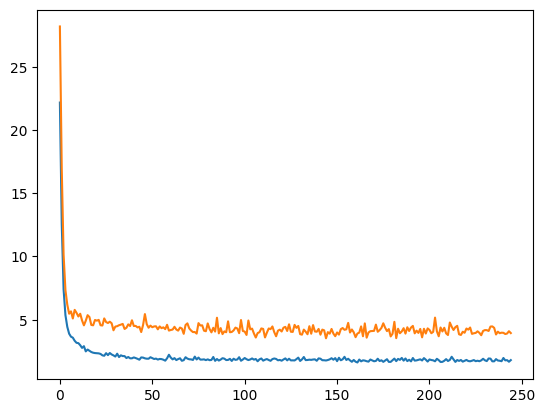

In [18]:
plt.plot(train_curve)
plt.plot(valid_curve)

In [19]:
import torch
from utils import log_gaussian, torch_from_numpy, kld

def tmp_nll(sads_array, z):
    sads_array = torch_from_numpy(sads_array)
    z = torch_from_numpy(np.array(z).reshape(-1))
#     z += torch.randn_like(z) * torch.exp(0.5*vi.initial_belief[vi.z_dim:])
    z += torch.randn_like(z) * np.exp(0.5*(-8))
    saz = torch.cat([sads_array[:, :(vi.sa_dim)], z* torch.ones(len(sads_array), vi.z_dim)], dim=1)
    ds_mulogvar = vi.dec(saz)
    ds = sads_array[:, (vi.sa_dim):(vi.sas_dim)]
    loss = - log_gaussian(ds, # y
               ds_mulogvar[:, :vi.s_dim], # mu
               ds_mulogvar[:, vi.s_dim:] # logvar
               ).sum()
#     print(z)
    loss +=  kld(z,
                 vi.initial_belief[vi.z_dim:],
                 vi.initial_belief.detach()[:vi.z_dim],
                 vi.initial_belief.detach()[vi.z_dim:])
#                  vi.prior[:vi.z_dim],
#                  vi.prior[vi.z_dim:])
    
    return loss.detach().numpy()

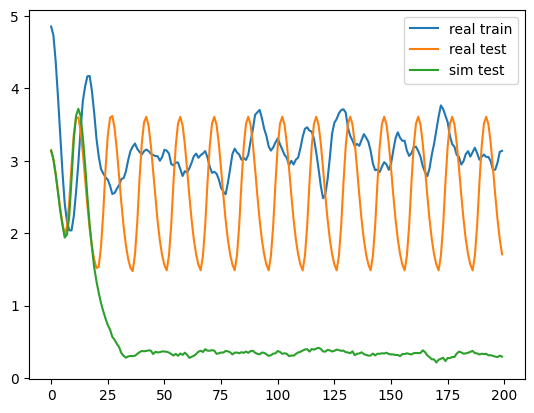

encoder [-2.682736 -8.      ]
initial_belief tensor([-2.3792, -2.3565])
real train tensor([-2.7194, -8.0115])
real test tensor([-2.7494, -7.9996])
sim tensor([-2.6682, -7.9906])


In [20]:
# i = 24
i = 19


tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief1 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief2 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief3 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()
plt.show()


print("encoder", vi.mulogvar_offlinedata[i].numpy())
print("initial_belief", vi.initial_belief.data)
print("real train",belief1)
print("real test",belief2)
print("sim", belief3)

-2.63265306122449


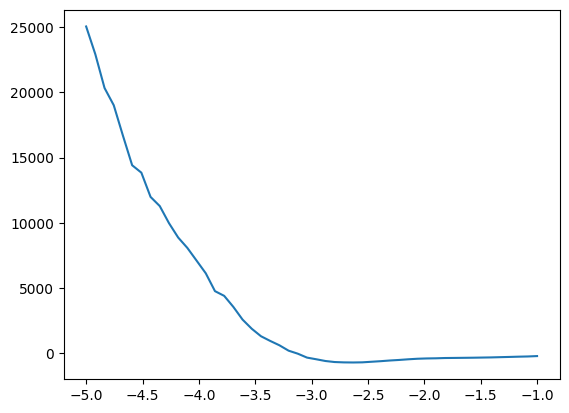

In [21]:
# tmp_data = 1 * vi.offline_data[i]
# tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
tmp_data = 1 * simdata1[i]

np_mulogvar = vi.mulogvar_offlinedata.numpy()

ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])

z_array = np.linspace(np_mulogvar[:,0].min()-1,np_mulogvar[:,0].max()+1)
z_array = np.linspace(-5,-1)

nll_list = []
for i in range(len(z_array)):
    nll_list.append(tmp_nll(sads_array, z_array[i]))
nll_list = np.array(nll_list)
plt.plot(z_array, nll_list)

print(z_array[np.argmin(nll_list)])